# Analyze phone confusion

In [1]:
import json
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
model_name = 'model_10h'
results = f'../data/output/{model_name}/output_test_{model_name}_forced_alignment_with_reference.json'

with open(results) as f:
    json_results = json.load(f)

In [3]:
tokens = list({"<pad>": 0, "<s>": 1, "</s>": 2, "<unk>": 3, "|": 4, "a": 5, "b": 6, "d": 7, "1": 8, "e": 9, "f": 10, "i": 11, "j": 12, "2": 13, "k": 14, "l": 15, "m": 16, "n": 17, "o": 18, "p": 19, "r": 20, "s": 21, "t": 22, "3": 23, "u": 24, "v": 25, "w": 26, "4": 27, "z": 28, "ã": 29, "õ": 30, "ĩ": 31, "ũ": 32, "ɔ": 33, "ɛ": 34, "ɡ": 35, "ɲ": 36, "ʃ": 37, "ʎ": 38, "ʒ": 39, "χ": 40, "ẽ": 41}.keys())

codes = {'<pad>': '<pad>', '<s>': '<s>', '</s>': '</s>', '<unk>': '<unk>',
         '|': '|', 'a': 'a', 'b': 'b', 'd': 'd', 'dʒ': '1', 'e': 'e', 'f': 'f',
         'i': 'i', 'j': 'j', 'j̃': '2', 'k': 'k', 'l': 'l', 'm': 'm', 'n': 'n',
         'o': 'o', 'p': 'p', 'r': 'r', 's': 's', 't': 't', 'tʃ': '3', 'u': 'u',
         'v': 'v', 'w': 'w', 'w̃': '4', 'z': 'z', 'ã': 'ã', 'õ': 'õ', 'ĩ': 'ĩ',
         'ũ': 'ũ', 'ɔ': 'ɔ', 'ɛ': 'ɛ', 'ɡ': 'ɡ', 'ɲ': 'ɲ', 'ʃ': 'ʃ', 'ʎ': 'ʎ',
         'ʒ': 'ʒ', 'χ': 'χ', 'ẽ': 'ẽ'}
symbol2phoneme = {v: k for k, v in codes.items()}

phonemes = []

for i in tokens:
    if i not in ["<s>", "</s>", "<unk>", "|"]:
        phonemes.append(symbol2phoneme[i])
print(phonemes)

['<pad>', 'a', 'b', 'd', 'dʒ', 'e', 'f', 'i', 'j', 'j̃', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'tʃ', 'u', 'v', 'w', 'w̃', 'z', 'ã', 'õ', 'ĩ', 'ũ', 'ɔ', 'ɛ', 'ɡ', 'ɲ', 'ʃ', 'ʎ', 'ʒ', 'χ', 'ẽ']


In [4]:
count_df = pd.DataFrame(0, index=phonemes, columns=phonemes)
errors_ids = []
y_true = []
y_pred = []

In [5]:
for audio_id in json_results:
    for word in json_results[audio_id]["words"]:
        for i in range(len(word["tokens"])):
            token = word["tokens"][i]
            ref = token["label"]
            pred = token["pred_token"]
            if pred != "|":
                y_true.append(ref)
                y_pred.append(pred)
                count_df.loc[ref, pred] += 1

## Confusion matrix

In [6]:
cm = pd.DataFrame(confusion_matrix(y_true, y_pred, labels=list(phonemes), normalize='true').T, 
                  index=phonemes, columns=phonemes)

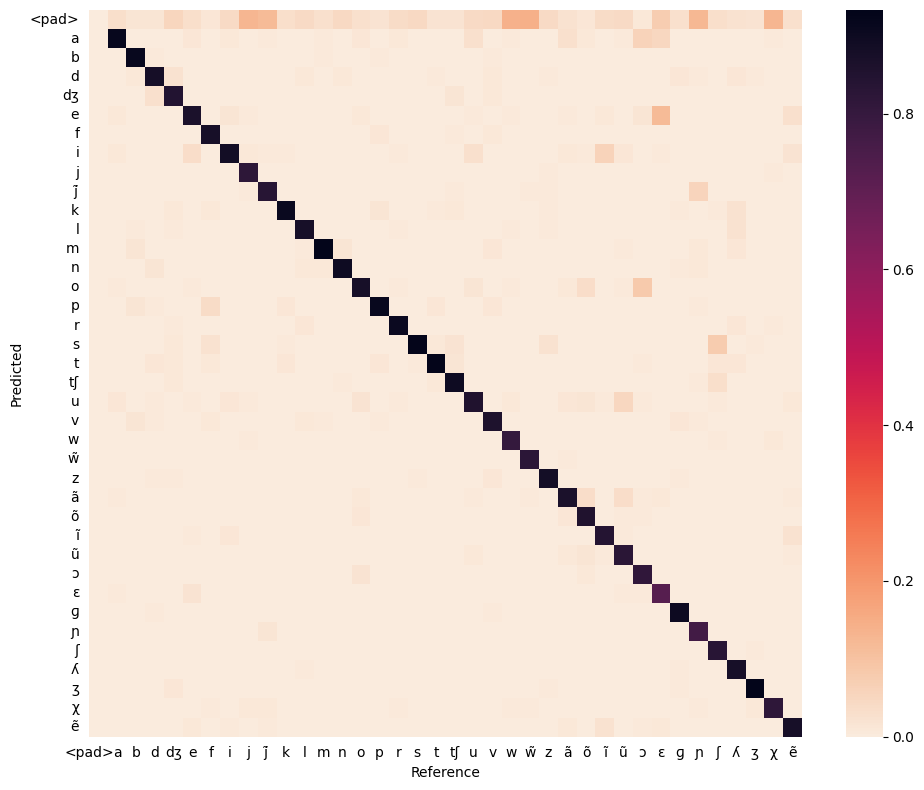

In [7]:
plt.figure(figsize=(10, 8))
cmap = sns.color_palette("rocket_r", as_cmap=True)
ax = sns.heatmap(cm, cmap=cmap)

plt.xticks(ticks=[i for i in range(len(phonemes))], labels=phonemes)
plt.yticks(ticks=[i for i in range(len(phonemes))], labels=phonemes)

current_xticks = ax.get_xticks()
current_xticklabels = ax.get_xticklabels()
shift = (current_xticks[1] - current_xticks[0]) / 2
new_xticks = current_xticks + shift
new_xticks[0] = current_xticks[0] # fix position of <pad>

ax.set_xticks(new_xticks, labels=[label.get_text() for label in current_xticklabels], rotation=0)

current_yticks = ax.get_yticks()
current_yticklabels = ax.get_yticklabels()
shift = (current_yticks[1] - current_yticks[0]) / 2
new_yticks = current_yticks + shift

ax.set_yticks(new_yticks, labels=[label.get_text() for label in current_yticklabels])

plt.tick_params(bottom=False, top=False, left=False, right=False)

ax.set_xlabel('Reference')

ax.set_ylabel('Predicted')

plt.tight_layout()
plt.savefig(f'../images/{model_name}/confusion_matrix_{model_name}.png')
plt.show()

## Accuracy

In [53]:
cm_count = pd.DataFrame(confusion_matrix(y_true, y_pred, labels=list(phonemes)).T, 
                  index=phonemes, columns=phonemes)

cm_phones = cm_count.drop(columns='<pad>', index='<pad>')
print(np.diag(cm_phones).sum() / cm_phones.sum().sum())

0.9222630495400411
